In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv(r'C:\Users\akhil\Downloads\Titanic DS\Loan\train_loan.csv')

In [3]:
test_df = pd.read_csv(r'C:\Users\akhil\Downloads\Titanic DS\Loan\test_loan.csv')
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train_original = train_df.copy()
test_original = test_df.copy()

In [5]:
print(train_df.shape)
print(test_df.shape)

(614, 13)
(367, 12)


## Missing value treatment

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
100*(train_df.isnull().sum()/train_df.shape[0]).round(3)

Loan_ID              0.0
Gender               2.1
Married              0.5
Dependents           2.4
Education            0.0
Self_Employed        5.2
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           3.6
Loan_Amount_Term     2.3
Credit_History       8.1
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- For categorical variable: imputation of mode
- For numerical variable: imputation of mean

In [9]:
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [10]:
train_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [11]:
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [12]:
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)

Now lets check whether all the missing values are filled in the dataset.

In [13]:
100*train_df.isnull().sum()/train_df.shape[0]

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

### For test dataset

In [14]:
test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace=True)
test_df['Married'].fillna(test_df['Married'].mode()[0], inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0], inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].median(), inplace=True)

## Outlier Treatment

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Let's examine what can happen to a data set with outliers. For the sample data set:

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

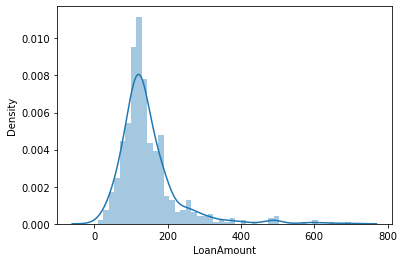

In [15]:
sns.distplot(train_df['LoanAmount'])

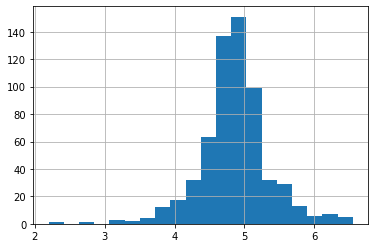

In [16]:
train_df['LoanAmount_log'] = np.log(train_df['LoanAmount']) 
train_df['LoanAmount_log'].hist(bins=20) 
test_df['LoanAmount_log'] = np.log(test_df['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

## Normalize

In [17]:
train_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [18]:
train_df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

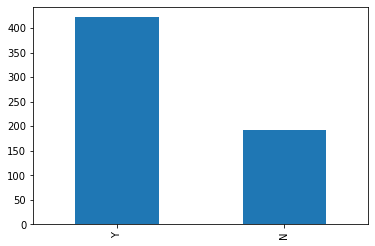

In [19]:
train_df['Loan_Status'].value_counts().plot.bar()

<p>Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)</p>
<p>Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)</p>
<p>Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)</p>

# Univariate Analysis

## Categorical features

<AxesSubplot:title={'center':'Credit_History'}>

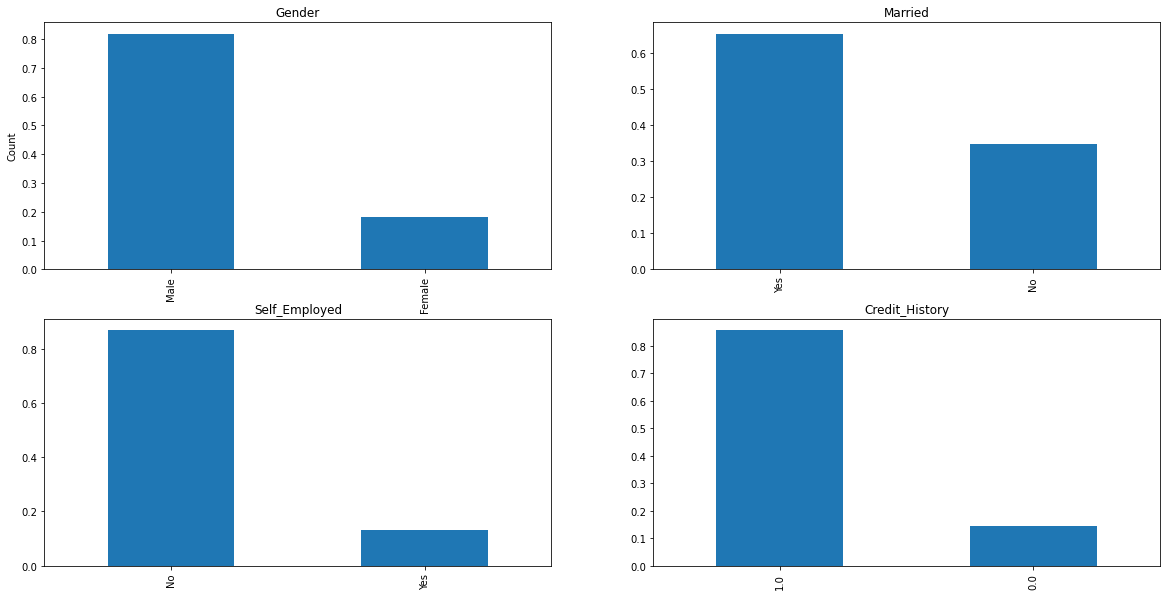

In [20]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(20,10)
train_df['Gender'].value_counts(normalize=True).plot(kind='bar', ax=ax[0,0], title='Gender')
ax[0,0].set_ylabel('Count')
train_df['Married'].value_counts(normalize=True).plot(kind='bar', ax=ax[0,1], title='Married')
train_df['Self_Employed'].value_counts(normalize=True).plot(kind='bar', ax=ax[1,0], title='Self_Employed')
train_df['Credit_History'].value_counts(normalize=True).plot(kind='bar', ax=ax[1,1], title='Credit_History')

<p> It can be inferred from the above bar plots that:</p>

- 80% applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.

## Ordinal Features

<AxesSubplot:title={'center':'Property_Area'}>

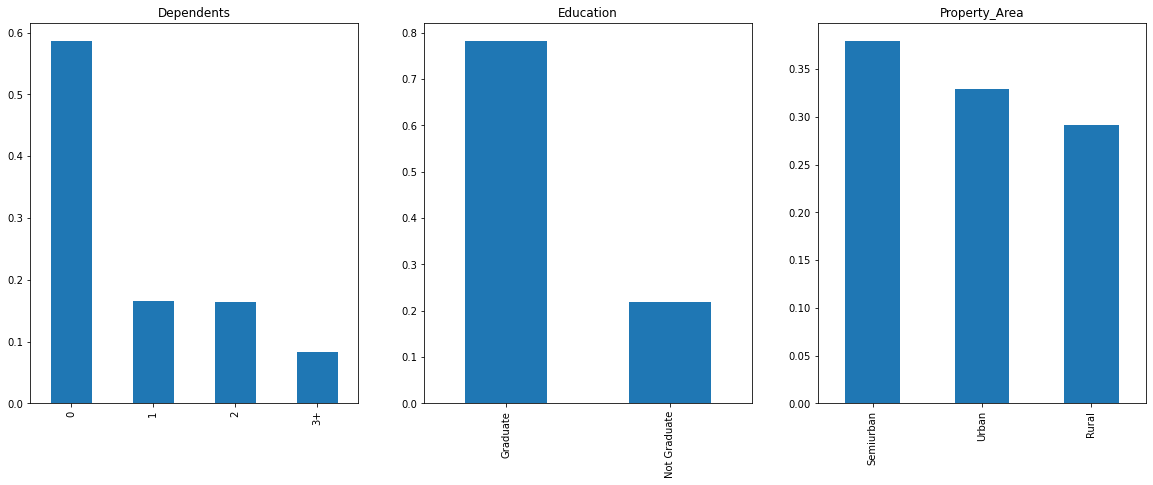

In [21]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,7)
train_df['Dependents'].value_counts(normalize=True).plot(kind='bar', ax=ax[0], title='Dependents')
train_df['Education'].value_counts(normalize=True).plot(kind='bar', ax=ax[1], title='Education')
train_df['Property_Area'].value_counts(normalize=True).plot(kind='bar', ax=ax[2], title='Property_Area')

Following inferences can be made from the above bar plots:

- Most of the applicants don’t have any dependents.
- Around 80% of the applicants are Graduate.
- Most of the applicants are from Semiurban area.

## Independent Variable (Numerical)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

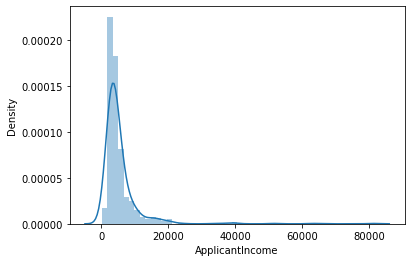

In [22]:
sns.distplot(train_df['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome'>

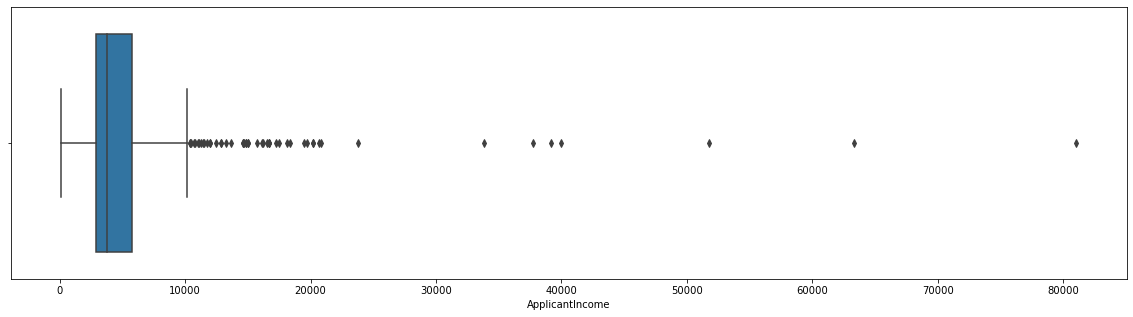

In [23]:
plt.figure(figsize=(20,5))
sns.boxplot(train_df['ApplicantIncome'], orient="v")

<AxesSubplot:xlabel='ApplicantIncome'>

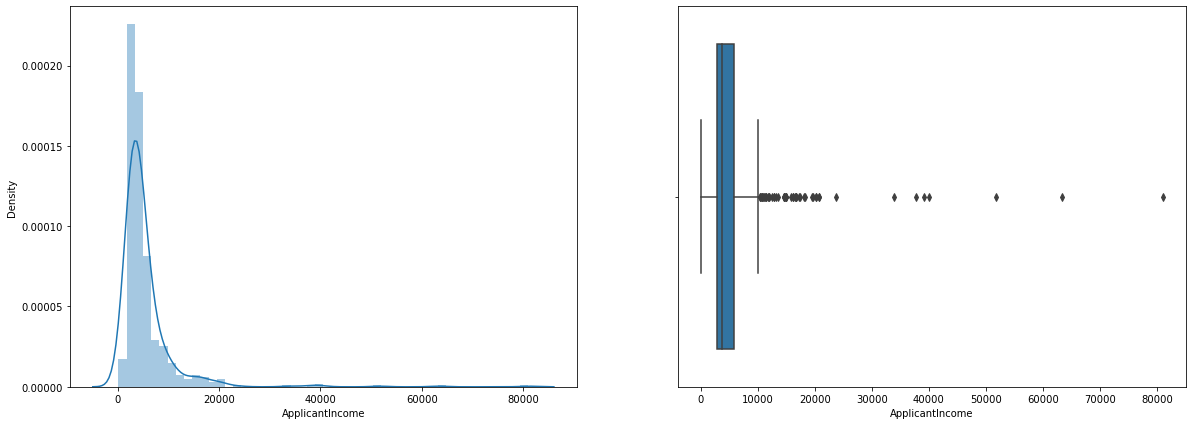

In [24]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,7)
sns.distplot(train_df['ApplicantIncome'], ax=ax[0])
sns.boxplot(train_df['ApplicantIncome'], ax= ax[1], orient="v")

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

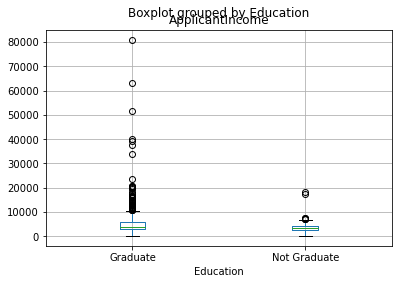

In [25]:
train_df.boxplot(column='ApplicantIncome', by = 'Education')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Education'>

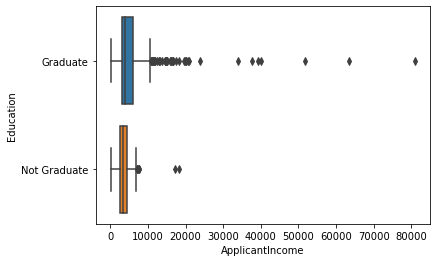

In [26]:
sns.boxplot(train_df['ApplicantIncome'],  train_df['Education'])

### We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers. 

<AxesSubplot:xlabel='CoapplicantIncome'>

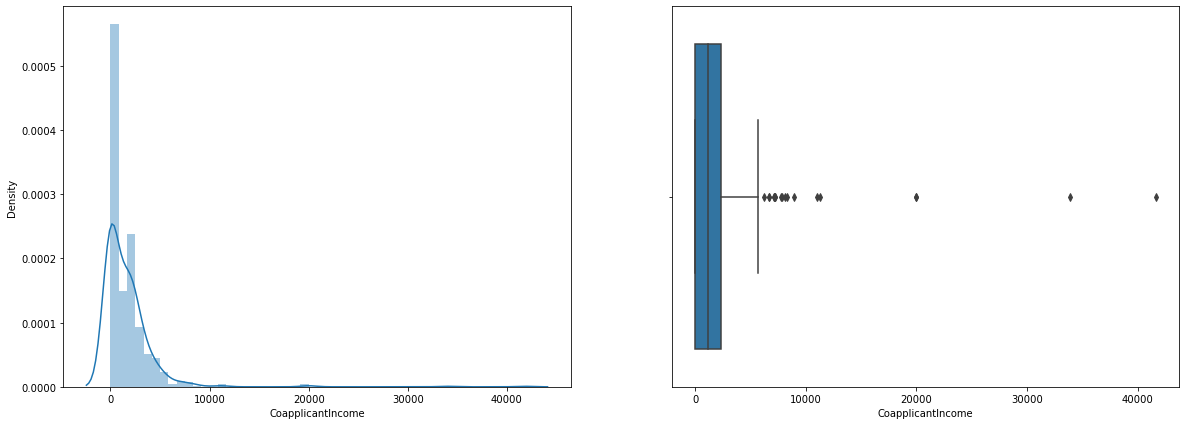

In [27]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,7)
sns.distplot(train_df['CoapplicantIncome'], ax=ax[0])
sns.boxplot(train_df['CoapplicantIncome'], ax= ax[1], orient="v")

#### We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

<AxesSubplot:xlabel='LoanAmount'>

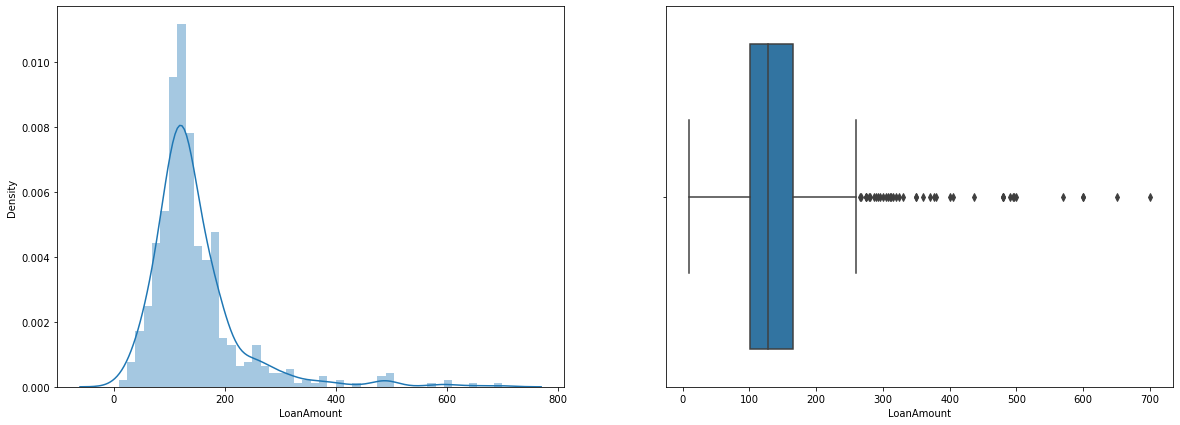

In [28]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,7)
sns.distplot(train_df['LoanAmount'], ax=ax[0])
sns.boxplot(train_df['LoanAmount'], ax=ax[1])

#### We see a lot of outliers in this variable and the distribution is fairly normal. 

- Applicants with high income should have more chances of loan approval.
- Applicants who have repaid their previous debts should have higher chances of loan approval.
- Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
- Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

# Bivariate Analysis

## Categorical Independent Variable vs Target Variable

In [29]:
pd.crosstab(train_df['Gender'], train_df['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


<AxesSubplot:xlabel='Gender'>

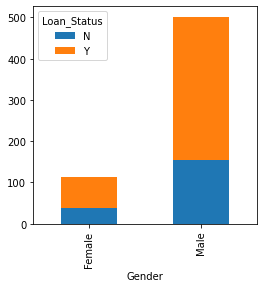

In [30]:
pd.crosstab(train_df['Gender'], train_df['Loan_Status']).plot.bar(stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Gender'>

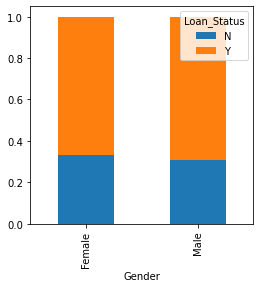

In [31]:
gender = pd.crosstab(train_df['Gender'], train_df['Loan_Status'])
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Self_Employed'>

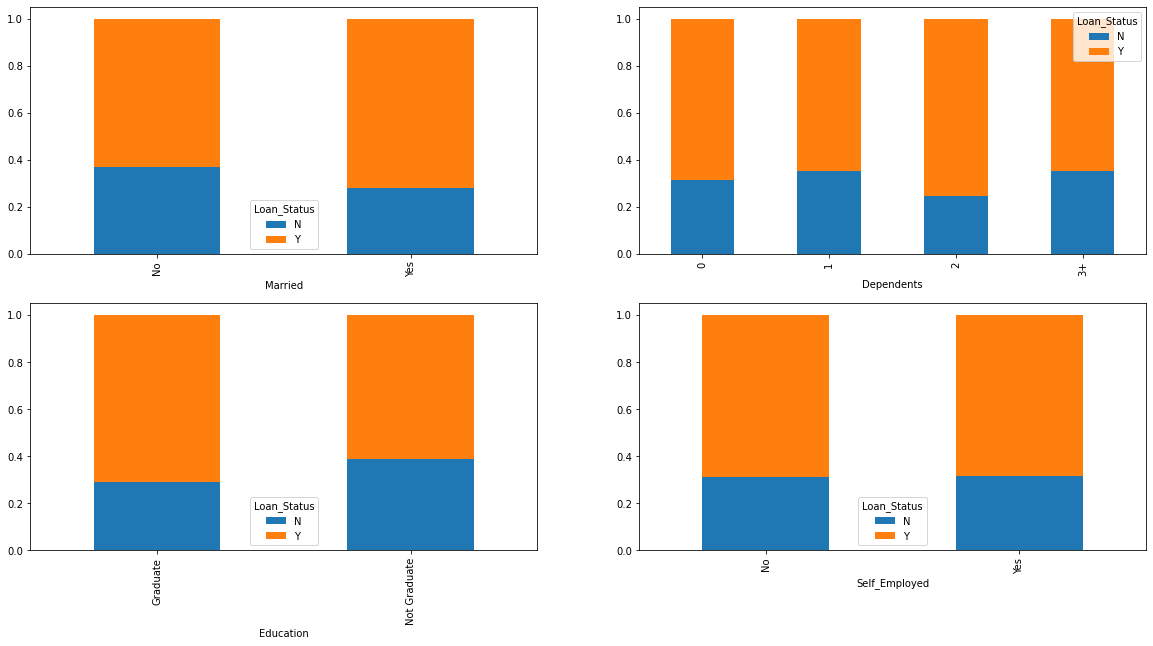

In [32]:
fig, ax= plt.subplots(2,2)
fig.set_size_inches(20,10)
Married=pd.crosstab(train_df['Married'],train_df['Loan_Status']) 
Dependents=pd.crosstab(train_df['Dependents'],train_df['Loan_Status']) 
Education=pd.crosstab(train_df['Education'],train_df['Loan_Status']) 
Self_Employed=pd.crosstab(train_df['Self_Employed'],train_df['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[0,0])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[0,1])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[1,0])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[1,1])

- Proportion of married applicants is higher for the approved loans.
- Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
- There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

<AxesSubplot:xlabel='Property_Area'>

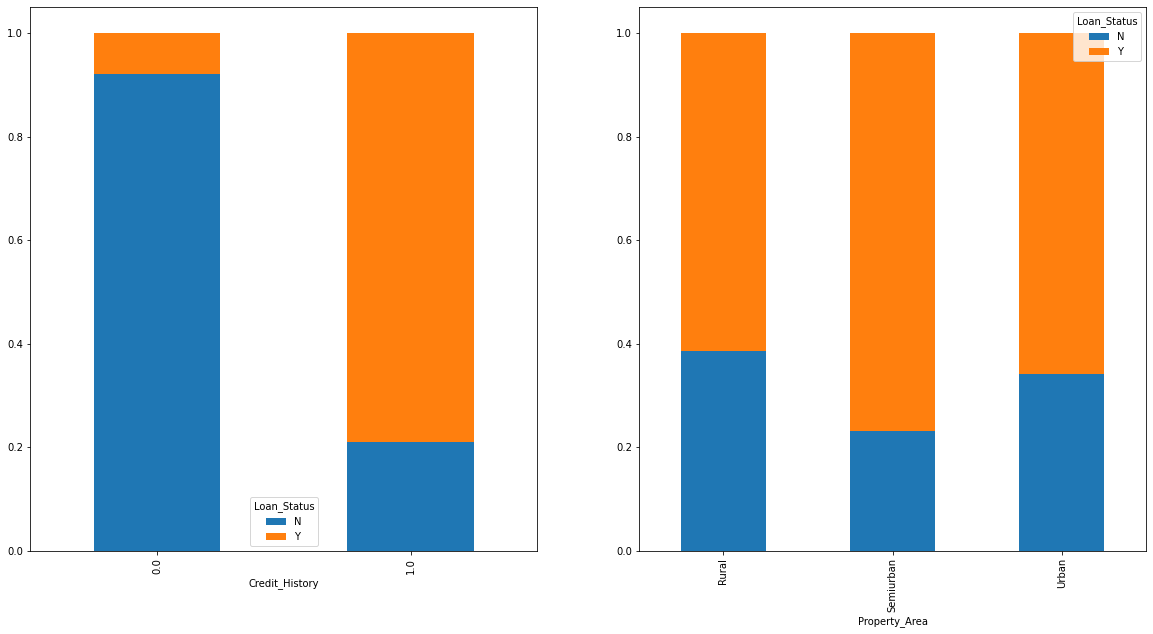

In [33]:
fig, ax= plt.subplots(1,2)
fig.set_size_inches(20,10)
Credit_History=pd.crosstab(train_df['Credit_History'],train_df['Loan_Status']) 
Property_Area=pd.crosstab(train_df['Property_Area'],train_df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax[0])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax[1])

- It seems people with credit history as 1 are more likely to get their loans approved.
- Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

## Categorical Independent Variable vs Target Variable

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Loan_Status'>

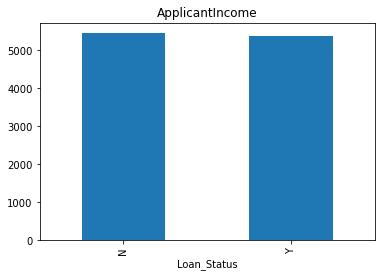

In [34]:
train_df.groupby('Loan_Status')['ApplicantIncome'].mean().plot(kind='bar',  title='ApplicantIncome')

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [35]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train_df['Income_bin']=pd.cut(train_df['ApplicantIncome'],bins,labels=group)
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,High


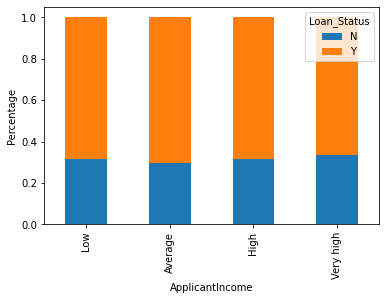

In [36]:
Income_bin=pd.crosstab(train_df['Income_bin'],train_df['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
p = plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.
<p>We will analyze the coapplicant income and loan amount variable in similar manner.</p>

<AxesSubplot:xlabel='CoapplicantIncome_bin'>

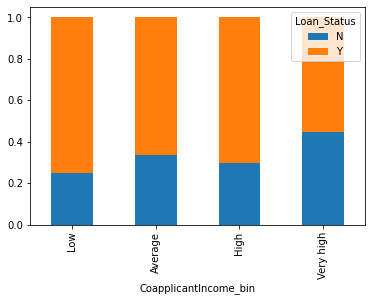

In [37]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train_df['CoapplicantIncome_bin']=pd.cut(train_df['CoapplicantIncome'],bins,labels=group)
CoapplicantIncome = pd.crosstab(train_df['CoapplicantIncome_bin'],train_df['Loan_Status'])
CoapplicantIncome.div(CoapplicantIncome.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

<AxesSubplot:xlabel='Total_Income_bin'>

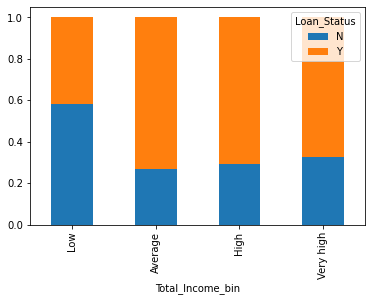

In [38]:
train_df['Total_Income']=train_df['ApplicantIncome']+train_df['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train_df['Total_Income_bin']=pd.cut(train_df['Total_Income'],bins,labels=group)
Total_Income_Bin = pd.crosstab(train_df['Total_Income_bin'],train_df['Loan_Status'])
Total_Income_Bin.div(Total_Income_Bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

### Let’s visualize the Loan amount variable.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

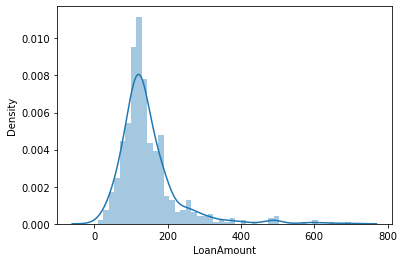

In [39]:
sns.distplot(train_df['LoanAmount'])

In [40]:
bins= [0,100, 200, 400, 700]
group=['Low','Average','High', 'Very high']
train_df['LoanAmountBin'] = pd.cut(train_df['LoanAmount'], bins, labels=group)
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Income_bin,CoapplicantIncome_bin,Total_Income,Total_Income_bin,LoanAmountBin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,High,NaN,5849.0,High,Average
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,High,Low,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,Average,Low,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,High,NaN,6000.0,High,Average


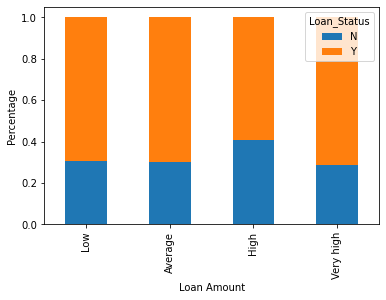

In [41]:
LoanAmountBin_one = pd.crosstab(train_df['LoanAmountBin'], train_df['Loan_Status'])
LoanAmountBin_one = LoanAmountBin_one.div(LoanAmountBin_one.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
p = plt.xlabel('Loan Amount')
i = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [42]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Income_bin,CoapplicantIncome_bin,Total_Income,Total_Income_bin,LoanAmountBin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,High,NaN,5849.0,High,Average
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,High,Low,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,Average,Low,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,High,NaN,6000.0,High,Average


In [43]:
train_df.drop(['CoapplicantIncome_bin', 'Total_Income_bin', 'LoanAmountBin', 'Income_bin'], axis=1, inplace=True)

In [44]:
train_df['Dependents'].replace('3+', 3,inplace=True) 
test_df['Dependents'].replace('3+', 3,inplace=True) 
train_df['Loan_Status'].replace('N', 0,inplace=True) 
train_df['Loan_Status'].replace('Y', 1,inplace=True)


Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

<AxesSubplot:>

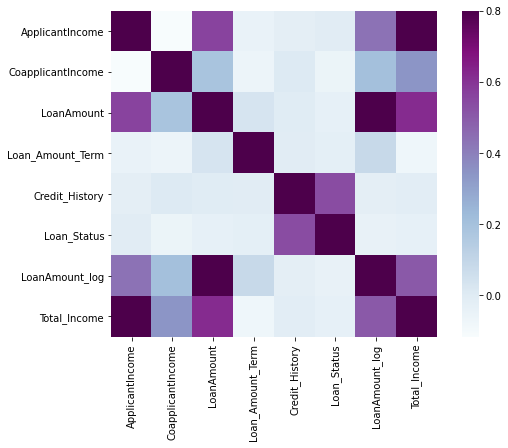

In [45]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(train_df.corr(), vmax=.8, square=True, cmap="BuPu")

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

## Model Building - Part 1

Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [46]:
train_df.drop('Loan_ID', axis=1, inplace= True)
test_df.drop('Loan_ID', axis=1, inplace= True)

In [47]:
train_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'Total_Income'],
      dtype='object')

In [48]:
X = train_df.drop('Loan_Status', axis=1)
y = train_df['Loan_Status']

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:

- Consider the “Gender” variable. It has two classes, Male and Female.
- As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.
- Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.
- Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

In [49]:
X = pd.get_dummies(X)
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [52]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = lr.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred)

0.827027027027027

## stratified k-fold cross validation

To check how robust our model is to unseen data, we can use Validation. It is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Some of the common methods for validation are listed below:

- The validation set approach
- k-fold cross validation
- Leave one out cross validation (LOOCV)
- Stratified k-fold cross validation

### Stratified k-fold
- Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.
- For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.
- It is generally a better approach when dealing with both bias and variance.
- A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance

Below is the visualization of a stratified k-fold validation when k=5.

In [55]:
from sklearn.model_selection import StratifiedKFold

In [56]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))
    pred=lr.predict_proba(x_test_fold)[:,1]
    

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', np.std(lst_accu_stratified))    

List of possible accuracy: [0.7741935483870968, 0.8387096774193549, 0.8548387096774194, 0.8064516129032258, 0.8360655737704918, 0.7213114754098361, 0.7704918032786885, 0.8032786885245902, 0.7868852459016393, 0.7540983606557377]

Maximum Accuracy That can be obtained from this model is: 85.48387096774194 %

Minimum Accuracy: 72.1311475409836 %

Overall Accuracy: 79.4632469592808 %

Standard Deviation is: 0.039469311987268545


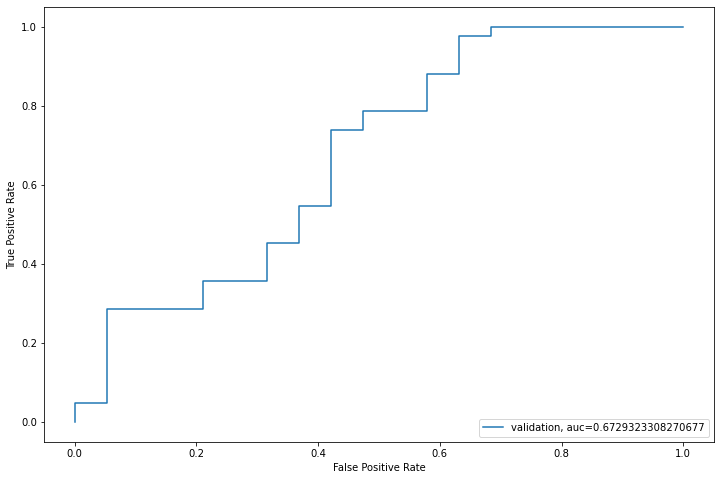

In [57]:
#Let us visualize the roc curve

from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(y_test_fold,  pred) 
auc = metrics.roc_auc_score(y_test_fold, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [58]:
train_df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'Total_Income', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_3', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

- Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
- EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
- Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [59]:
train_df['Total_Income']=train_df['ApplicantIncome']+train_df['CoapplicantIncome'] 
test_df['Total_Income']=test_df['ApplicantIncome']+test_df['CoapplicantIncome']

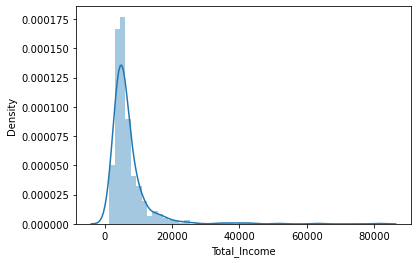

In [60]:
#Let’s check the distribution of Total Income.

sns.distplot(train_df['Total_Income']);

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

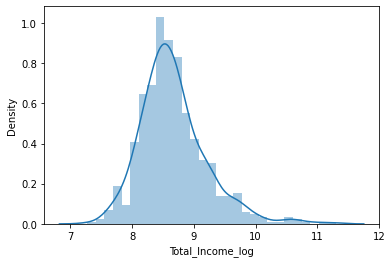

In [61]:
train_df['Total_Income_log'] = np.log(train_df['Total_Income']) 
sns.distplot(train_df['Total_Income_log']); 
test_df['Total_Income_log'] = np.log(test_df['Total_Income'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s create the EMI feature now.

In [62]:
train_df['EMI'] = train_df['LoanAmount']/(train_df['Loan_Amount_Term']/30)
test_df['EMI'] = test_df['LoanAmount']/test_df['Loan_Amount_Term']

<AxesSubplot:xlabel='EMI', ylabel='Density'>

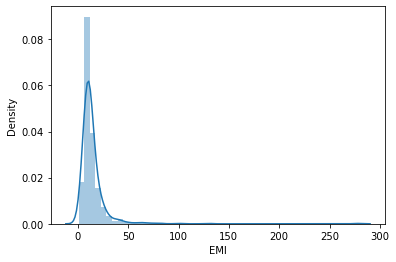

In [63]:
sns.distplot(train_df['EMI'])

In [64]:
#To find the Balance Income 
train_df['BalanceIncome'] = train_df['Total_Income'] - train_df['EMI']
test_df['BalanceIncome'] = test_df['Total_Income'] - test_df['EMI']

<AxesSubplot:xlabel='BalanceIncome', ylabel='Density'>

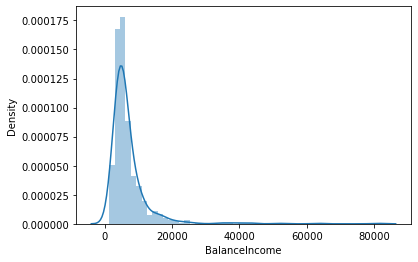

In [65]:
sns.distplot(train_df['BalanceIncome'])

Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [66]:
train_df = train_df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test_df = test_df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 

After creating new features, we can continue the model building process. So we will start with logistic regression model and then move over to more complex models like RandomForest and XGBoost.

## Machine learning models we can try
- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost

## Logistic Regression

In [67]:
X = train_df.drop('Loan_Status', axis=1)
y = train_df['Loan_Status']

In [68]:

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    lr = LogisticRegression(random_state=1)
    lr.fit(x_train_fold, y_train_fold)
    lr_pred = lr.predict(x_test_fold)
    score = accuracy_score(lr_pred, y_test_fold)
    lst_accu_stratified.append(score)
    #predicting with test data
    pred_test_df = lr.predict(test_df)
    pred=lr.predict_proba(x_test_fold)[:,1]
    

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', np.std(lst_accu_stratified))    

List of possible accuracy: [0.7903225806451613, 0.8387096774193549, 0.8548387096774194, 0.8064516129032258, 0.8360655737704918, 0.7540983606557377, 0.7704918032786885, 0.6885245901639344, 0.6721311475409836, 0.7377049180327869]

Maximum Accuracy That can be obtained from this model is: 85.48387096774194 %

Minimum Accuracy: 67.21311475409836 %

Overall Accuracy: 77.49338974087784 %

Standard Deviation is: 0.05940893149393974


### From this submission we got an accuracy of 77%. So we can infer feature engineering has not improved the model. 

## Decison Tree

In [69]:
from sklearn import tree

In [70]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    dt = tree.DecisionTreeClassifier(random_state=1)     
    dt.fit(x_train_fold, y_train_fold)
    dt_pred = dt.predict(x_test_fold)
    score = accuracy_score(dt_pred, y_test_fold)
    lst_accu_stratified.append(score)
    #predicting with test data
    pred_test_df = dt.predict(test_df)
    pred=dt.predict_proba(x_test_fold)[:,1]
    

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', np.std(lst_accu_stratified))    

List of possible accuracy: [0.6290322580645161, 0.7741935483870968, 0.6612903225806451, 0.6451612903225806, 0.819672131147541, 0.6885245901639344, 0.6885245901639344, 0.7377049180327869, 0.6721311475409836, 0.6557377049180327]

Maximum Accuracy That can be obtained from this model is: 81.9672131147541 %

Minimum Accuracy: 62.903225806451616 %

Overall Accuracy: 69.71972501322051 %

Standard Deviation is: 0.05806078344015073


## RandomForest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    rf = RandomForestClassifier(random_state=1, max_depth=10)     
    rf.fit(x_train_fold, y_train_fold)
    rf_pred = rf.predict(x_test_fold)
    score = accuracy_score(rf_pred, y_test_fold)
    lst_accu_stratified.append(score)
    #predicting with test data
    pred_test_df = rf.predict(test_df)
    pred=rf.predict_proba(x_test_fold)[:,1]
    

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', np.std(lst_accu_stratified))    

List of possible accuracy: [0.8064516129032258, 0.8387096774193549, 0.8548387096774194, 0.7580645161290323, 0.819672131147541, 0.7540983606557377, 0.7868852459016393, 0.8360655737704918, 0.7540983606557377, 0.7540983606557377]

Maximum Accuracy That can be obtained from this model is: 85.48387096774194 %

Minimum Accuracy: 75.40983606557377 %

Overall Accuracy: 79.62982548915917 %

Standard Deviation is: 0.03788073226176776


## Hyperparameter Tuning

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters. Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
## Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [75]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

In [76]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [77]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [78]:
GridSearchCV(cv=None, error_score='raise',       
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=None, 
             max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,            
             min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,            
             oob_score=False, random_state=1, verbose=0, warm_start=False), iid=True, n_jobs=1,       
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},     
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',       
             scoring=None, verbose=0)

GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(n_estimators=10, n_jobs=1,
                                              random_state=1),
             iid=True, n_jobs=1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]},
             return_train_score='warn')

In [79]:
# Estimating the optimized value 
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=81, random_state=1)

In [80]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=3, max_features='auto', 
                       max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, 
                       min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,          
                       oob_score=False, random_state=1, verbose=0, warm_start=False)

RandomForestClassifier(max_depth=3, n_estimators=41, n_jobs=1, random_state=1)

So, the optimized value for the max_depth variable is 3 and for n_estimator is 41. Now let’s build the model using these optimized values.

In [81]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    rf = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)     
    rf.fit(x_train_fold, y_train_fold)
    rf_pred = rf.predict(x_test_fold)
    score = accuracy_score(rf_pred, y_test_fold)
    lst_accu_stratified.append(score)
    #predicting with test data
    pred_test_df = rf.predict(test_df)
    pred=rf.predict_proba(x_test_fold)[:,1]
    

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', np.std(lst_accu_stratified))    

List of possible accuracy: [0.8292682926829268, 0.8373983739837398, 0.7886178861788617, 0.7886178861788617, 0.7868852459016393]

Maximum Accuracy That can be obtained from this model is: 83.73983739837398 %

Minimum Accuracy: 78.68852459016394 %

Overall Accuracy: 80.61575369852058 %

Standard Deviation is: 0.022346350170510634


<AxesSubplot:>

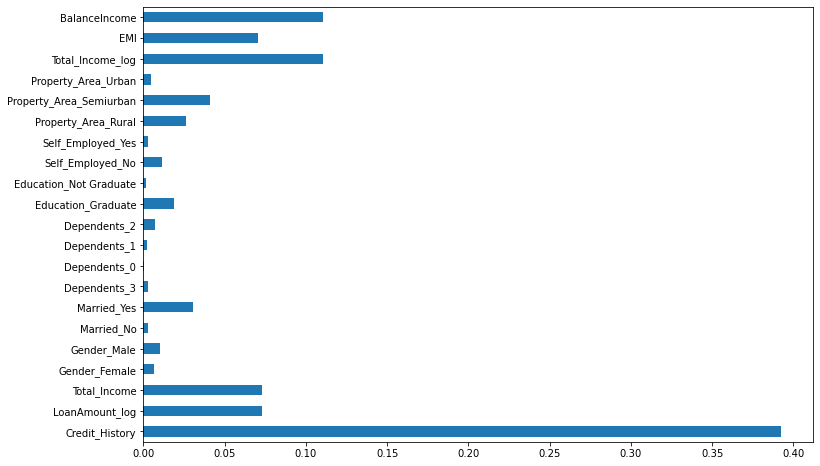

In [82]:
#Let us find the feature importance now, i.e. which features are most important for this problem. We will use feature_importances_ attribute of sklearn to do so.

importances=pd.Series(rf.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

Credit_History is the most important feature followed by Balance Income, Total Income, EMI. So, feature engineering helped us in predicting our target variable.

## XGBoost

In [83]:
#!pip install xgboost

In [84]:
from xgboost import XGBClassifier

In [85]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    xgb = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)     
    xgb.fit(x_train_fold, y_train_fold)
    xgb_pred = xgb.predict(x_test_fold)
    score = accuracy_score(xgb_pred, y_test_fold)
    lst_accu_stratified.append(score)
    #predicting with test data
    pred_test_df = xgb.predict(test_df)
    pred=xgb.predict_proba(x_test_fold)[:,1]
    

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', np.std(lst_accu_stratified))    

List of possible accuracy: [0.8292682926829268, 0.8373983739837398, 0.7886178861788617, 0.7886178861788617, 0.7868852459016393]

Maximum Accuracy That can be obtained from this model is: 83.73983739837398 %

Minimum Accuracy: 78.68852459016394 %

Overall Accuracy: 80.61575369852058 %

Standard Deviation is: 0.022346350170510634


After trying and testing 4 different algorithms, the best accuracy on the public leaderboard is achieved by Logistic Regression (0.7847), followed by RandomForest (0.7638).